In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV



import warnings
warnings.filterwarnings('ignore')

### Data Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Column Descriptions {Data dictionary}
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

Data source
* https://archive.ics.uci.edu/dataset/45/heart+disease
* https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [2]:
# to read the file 
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [3]:
df = wrangle("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
cat_cols=['thalach','ca','thal','target','fbs','chol','exang']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64
------------------------------
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
------------------------------
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
------------------------------
target
1    165
0    138
Name: count, dtype: int64
------------------------------
fbs
0    258
1     45
Name: count, dtype: int64
------------------------------
chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64
------------------------------
exang
0    204
1     99
Name: count, dtype: int64
------------------------------


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploring Data
* what question am i trying to solve?
* what's the missing value and how to deal with it if there is an
* what are the outliers
* how can you add,change or remove features to get more out of the data

In [8]:
# checking if there is a missing Value

print(f' is there missing value {df.isna().sum()}')

 is there missing value age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### checking for outflier for each columns and comparing it with the target variable

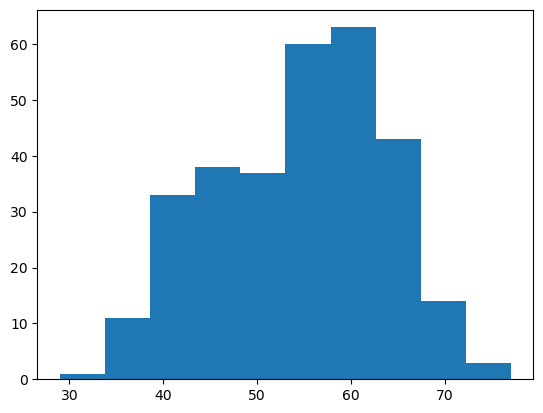

In [9]:
# Age
df["age"].hist(grid=False);

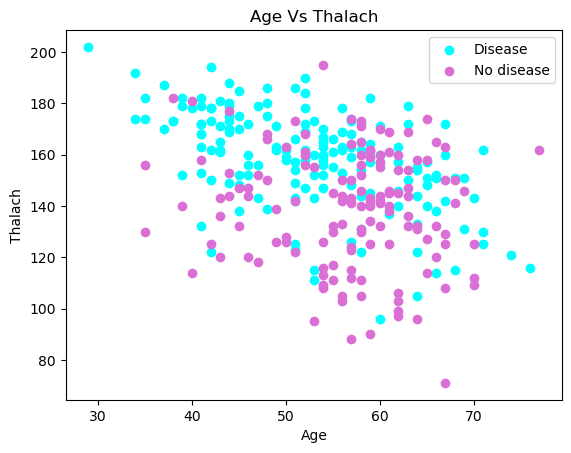

In [10]:
# Comparing Age with the target Variable
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="aqua")

# scatter for Negative sample
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="orchid")

plt.xlabel("Age")
plt.ylabel("Thalach")
plt.title("Age Vs Thalach")
plt.legend(["Disease","No disease"]);

In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


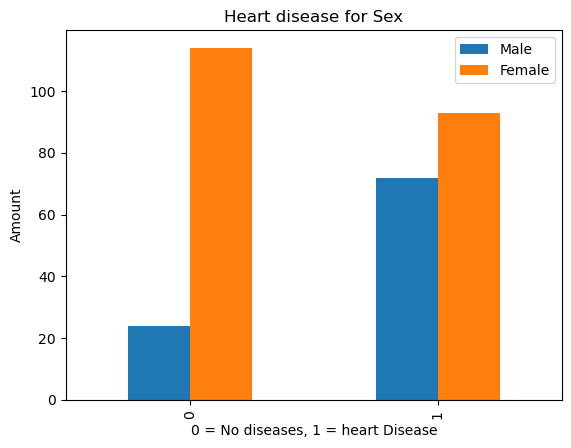

In [13]:
# comparing with the target varibale
pd.crosstab(df["target"],df["sex"]).plot.bar()
plt.xlabel("0 = No diseases, 1 = heart Disease")
plt.ylabel("Amount")
plt.title("Heart disease for Sex")
plt.legend(["Male","Female"]);

In [14]:
# # checking those that has heart disease or Not
target_count = df["target"].value_counts()

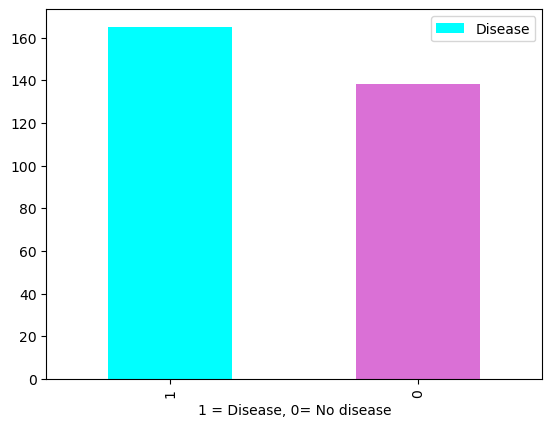

In [15]:
target_count.plot(kind="bar",color=["aqua","orchid"])
plt.xlabel("1 = Disease, 0= No disease")
plt.legend(["Disease","No disease"]);

In [16]:
# comparing the CP to the target variable (cp = Chest pain)
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [17]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


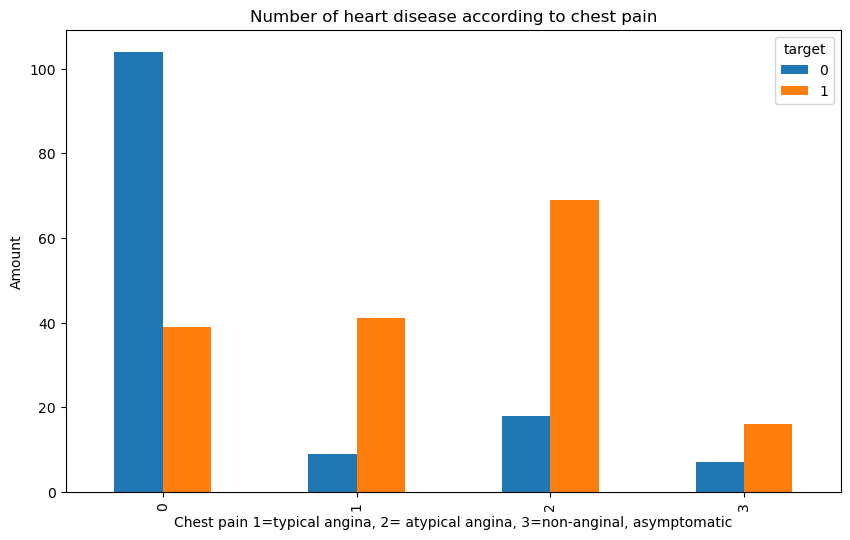

In [18]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6))
plt.xlabel("Chest pain 1=typical angina, 2= atypical angina, 3=non-anginal, asymptomatic")
plt.ylabel("Amount")
plt.title("Number of heart disease according to chest pain");

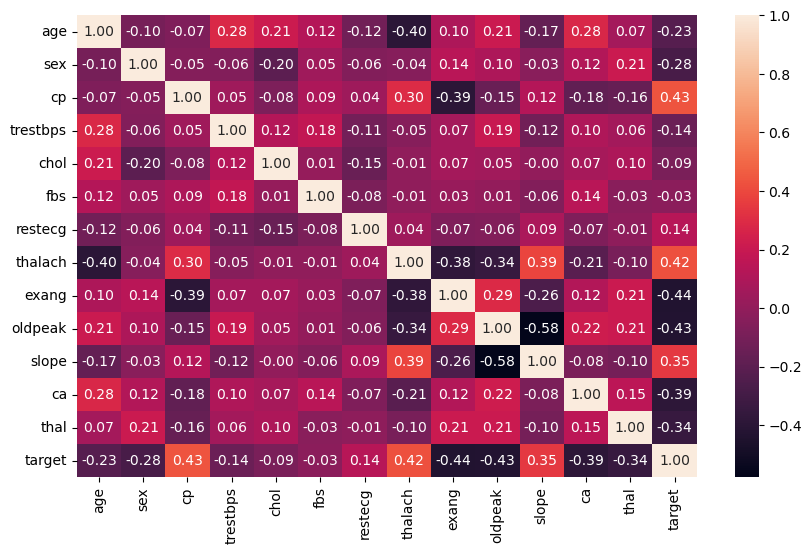

In [19]:
# checking for the correlation to know the feature to remove

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,annot=True,fmt="0.2f")

### Building Model

In [20]:
## Making the data 
X = df.drop("target",axis=1)
y = df["target"]

In [21]:
# splitting the data into X and y train
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

In [22]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [23]:
# Defines function for evaluating several classification models
def classification_model_performance_metrics(dict_models):
    """ Takes is a dictionary of models:
    Rrturns: A data frame Metrics of each classifier
    """

    models  = {}
    result = []
    
    for name, clf in dict_models.items():
        print ('Fitting {:s} model...'.format(name))
    
        run_time = %timeit -q -o clf.fit(X_train, y_train)
    
        print("Predicting...")
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
    
        print("Scoring...")
        accuracy_train      = accuracy_score(y_train, train_pred)
        recall_train        = recall_score(y_train, train_pred)
        precision_train     = precision_score(y_train, train_pred)
        f1_score_train      = f1_score(y_train, train_pred)
        
        accuracy_test  = accuracy_score(y_test, test_pred)
        recall_test  = recall_score(y_test, test_pred)
        precision_test = precision_score(y_test, test_pred)
        f1_score_test   = f1_score(y_test, test_pred)
    
        # Saving results
        models[name] = clf
    
        result.append([name, accuracy_train, recall_train, precision_train, f1_score_train, accuracy_test, recall_test,
                       precision_test, f1_score_test, run_time.best])
    
    result = pd.DataFrame(result, columns=["Classifier", " Train Accuracy", "Train Recall", "Train Precision", "Train F1 Score",
                                           " Test Accuracy", "Test Recall", "Test Precision", "Test F1 Score", "Train Time"])
    result.set_index("Classifier", inplace=True)
    print("All done!")

    return result

In [24]:
np.random.seed(42)
model = {
    "logisticregression" : LogisticRegression(),
         "Randomforestclassifier" : RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
         "Adaboost" : AdaBoostClassifier(n_estimators=100),
         "xgboost" : XGBClassifier(n_estimators=100),
         "Gradient boost": GradientBoostingClassifier(n_estimators=100)
}

Models = classification_model_performance_metrics(model)
Models

Fitting logisticregression model...
Predicting...
Scoring...
Fitting Randomforestclassifier model...
Predicting...
Scoring...
Fitting Adaboost model...
Predicting...
Scoring...
Fitting xgboost model...
Predicting...
Scoring...
Fitting Gradient boost model...
Predicting...
Scoring...
All done!


,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Train Time
Classifier,,,,,,,,,
logisticregression,0.863636,0.939850,0.833333,0.883392,0.885246,0.90625,0.878788,0.892308,0.018354
Randomforestclassifier,0.925620,0.954887,0.913669,0.933824,0.885246,0.90625,0.878788,0.892308,0.239261
Adaboost,0.962810,0.969925,0.962687,0.966292,0.770492,0.71875,0.821429,0.766667,0.281568
xgboost,1.000000,1.000000,1.000000,1.000000,0.819672,0.78125,0.862069,0.819672,0.156809
Gradient boost,1.000000,1.000000,1.000000,1.000000,0.770492,0.75000,0.800000,0.774194,0.214860


### Hypertuning for check how to reduced overfitting and increased underffiting to improve my model

In [37]:
# tuning the moel
np.random.seed(42)
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "saga"],
    "penalty": ["l1", "l2"]
}

rf_grid={"n_estimators" : [10,50,100,200,500,1000,1200],
        "max_depth" : [None,5,10,20,30,40],
        "max_features" : ["sqrt", "log2"],
        "min_samples_split" : np.arange(1,20,2),
        "min_samples_leaf" : np.arange(2,20,1)} 

Ada_boost = {"n_estimators" : [100],
             "learning_rate" : [1]}
gb_boost = {"n_estimators" : [100],
            "learning_rate" : [1.0],
            "max_depth" : [1]}
xgBoost = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }
            
             

In [26]:
## Instantiate all model
lg = LogisticRegression()
clf = RandomForestClassifier()
Ada = AdaBoostClassifier()
xg = XGBClassifier()
gb = GradientBoostingClassifier()

In [27]:
def evaluate_pred(y_true, y_pred):
    
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    metric_dict = {
        
        "recall" : round(recall,2),
        "precision" : round(precision,2),
        "f1_score" : round(f1,2),
        "accuracy" : round(accuracy,2)
    }

    return metric_dict

# Using Randomsearchcv


In [32]:
## using Hypertune for logistic


log_grid = RandomizedSearchCV(lg,param_distributions=log_reg_grid,n_iter=50,cv=5,verbose=True)

# fitting the model
log_grid.fit(X_train,y_train)

# Evaluate
log_grid.score(X_train,y_train)
log_grid.score(X_test,y_test)

# making prediction
log_train_pred = log_grid.predict(X_train)
log_test_pred = log_grid.predict(X_test)




Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [33]:
# getting the best params
log_grid.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [34]:
# getting the metric
log_metric = evaluate_pred(y_train,log_train_pred)
log_metric

{'recall': 0.94, 'precision': 0.83, 'f1_score': 0.88, 'accuracy': 0.86}

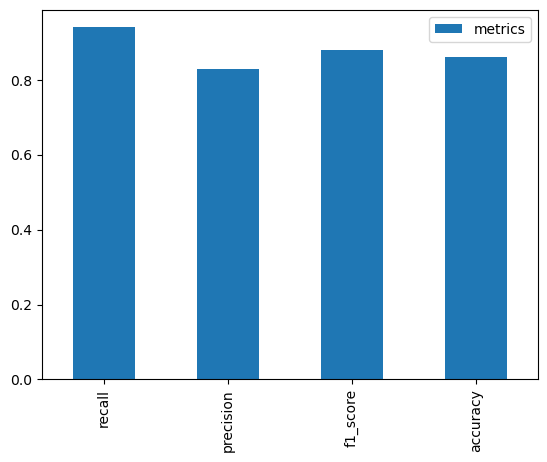

In [62]:
pd.DataFrame(log_metric,index=["metrics"]).T.plot(kind="bar");

In [35]:
log_metric1 = evaluate_pred(y_test,log_test_pred)
log_metric1

{'recall': 0.91, 'precision': 0.88, 'f1_score': 0.89, 'accuracy': 0.89}

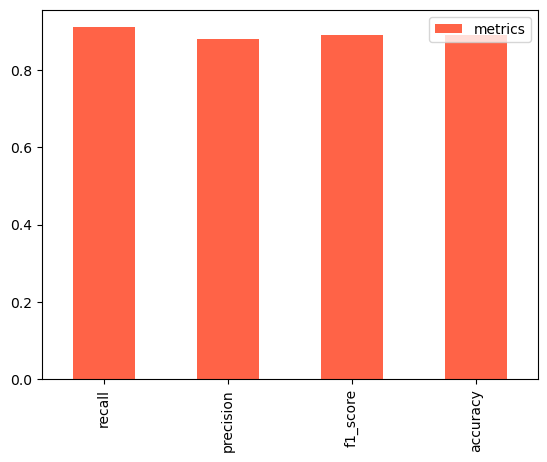

In [72]:
pd.DataFrame(log_metric1,index=["metrics"]).T.plot(kind="bar",color="tomato");

In [43]:
# Randomforestclassifier hypertune

clf_grid = RandomizedSearchCV(clf,param_distributions=rf_grid,n_iter=50,cv=5,verbose=True)

# fitting the model
clf_grid.fit(X_train,y_train)

# Evaluate
clf_grid.score(X_train,y_train)
clf_grid.score(X_test,y_test)

# making prediction
clf_train_pred = clf_grid.predict(X_train)
clf_test_pred = clf_grid.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [39]:
# getting the best params
clf_grid.best_params_


{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 30}

In [41]:
# getting the metric
clf_metric = evaluate_pred(y_train,clf_train_pred)
clf_metric

{'recall': 0.89, 'precision': 0.84, 'f1_score': 0.86, 'accuracy': 0.85}

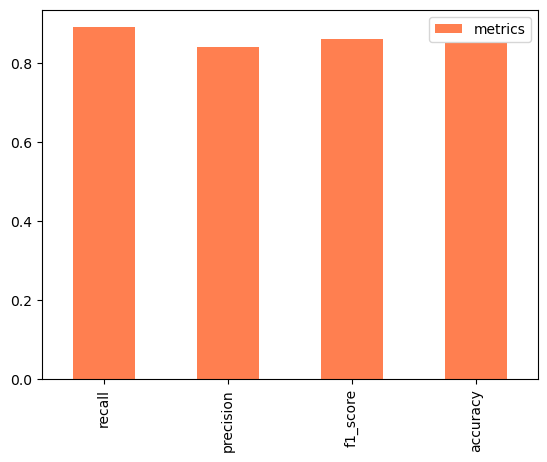

In [73]:
pd.DataFrame(clf_metric,index=["metrics"]).T.plot(kind="bar",color="coral");

In [42]:
clf_metric1 = evaluate_pred(y_test,clf_test_pred)
clf_metric1

{'recall': 0.91, 'precision': 0.85, 'f1_score': 0.88, 'accuracy': 0.87}

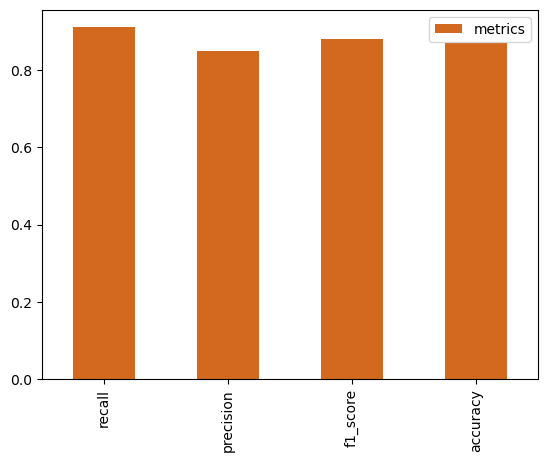

In [74]:
pd.DataFrame(clf_metric1,index=["metrics"]).T.plot(kind="bar",color="chocolate");

In [45]:
# Adaboost hypertune

Ada_grid = RandomizedSearchCV(Ada,param_distributions=Ada_boost,
                              n_iter=50,cv=5,verbose=True)

# fitting the model
Ada_grid.fit(X_train,y_train)

# Evaluate
Ada_grid.score(X_train,y_train)
Ada_grid.score(X_test,y_test)
# making prediction
Ada_train_pred = Ada_grid.predict(X_train)
Ada_test_pred = Ada_grid.predict(X_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [46]:
# getting the best params
Ada_grid.best_params_



{'n_estimators': 100, 'learning_rate': 1}

In [47]:

# getting the metric
Ada_metric = evaluate_pred(y_train,Ada_train_pred)
Ada_metric

{'recall': 0.97, 'precision': 0.96, 'f1_score': 0.97, 'accuracy': 0.96}

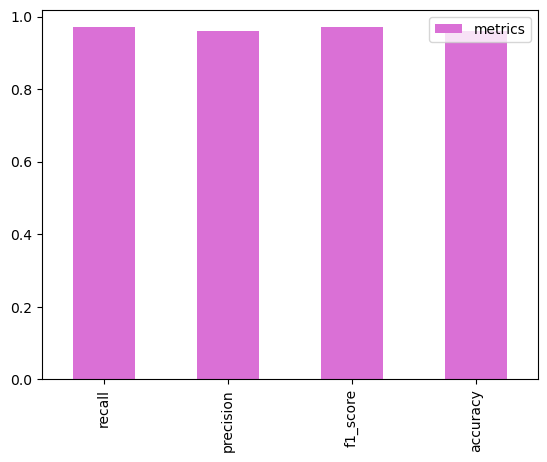

In [66]:
pd.DataFrame(Ada_metric,index=["metrics"]).T.plot(kind="bar",color="orchid");

In [48]:
Ada_metric1 = evaluate_pred(y_test,Ada_test_pred)
Ada_metric1

{'recall': 0.72, 'precision': 0.82, 'f1_score': 0.77, 'accuracy': 0.77}

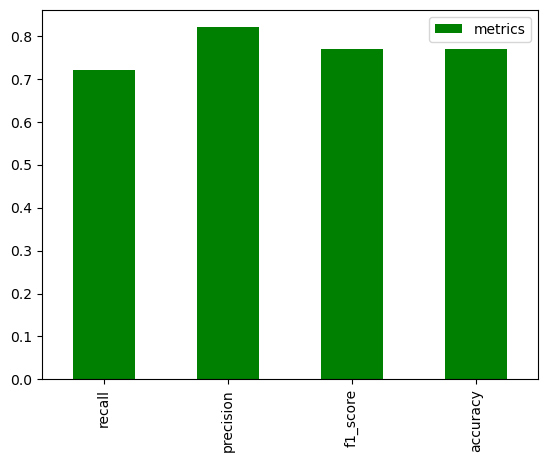

In [67]:
pd.DataFrame(Ada_metric1,index=["metrics"]).T.plot(kind="bar",color="green");

In [51]:
# Xgboost hypertune

xg_grid = RandomizedSearchCV(xg,param_distributions=xgBoost,
                             n_iter=50,cv=5,verbose=True)

# fitting the model
xg_grid.fit(X_train,y_train)

# Evaluate
xg_grid.score(X_train,y_train)
xg_grid.score(X_test,y_test)

# making prediction
xg_train_pred = xg_grid.predict(X_train)
xg_test_pred = xg_grid.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [52]:
# getting the best params
xg_grid.best_params_

{'subsample': 0.7,
 'n_estimators': 125,
 'gamma': 3,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 1}

In [53]:

# getting the metric
xg_metric = evaluate_pred(y_train,xg_train_pred)
xg_metric

{'recall': 0.95, 'precision': 0.91, 'f1_score': 0.93, 'accuracy': 0.92}

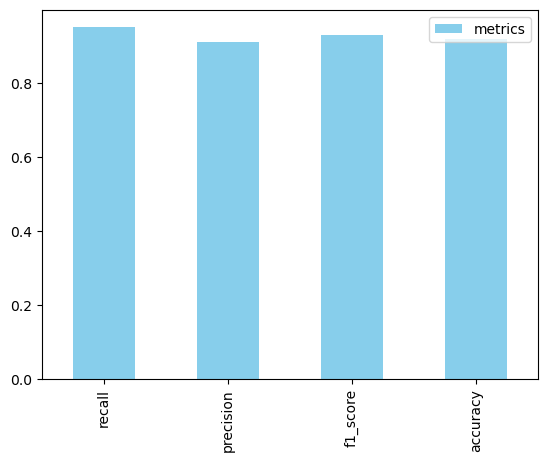

In [68]:
pd.DataFrame(xg_metric,index=["metrics"]).T.plot(kind="bar",color="skyblue");

In [54]:
# testing accuracy
xg_metric1 = evaluate_pred(y_test,xg_test_pred)
xg_metric1

{'recall': 0.84, 'precision': 0.84, 'f1_score': 0.84, 'accuracy': 0.84}

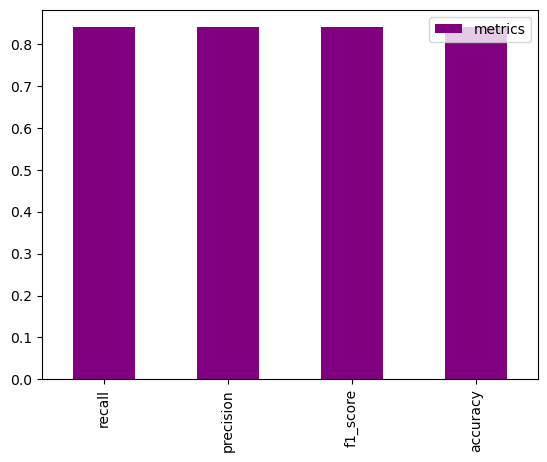

In [69]:
pd.DataFrame(xg_metric1,index=["metrics"]).T.plot(kind="bar",color="purple");

In [55]:
# gradient boost hypertune

gb_grid = RandomizedSearchCV(gb,param_distributions=gb_boost,
                             n_iter=50,
                             cv=5,verbose=True)

# fitting the model
gb_grid.fit(X_train,y_train)

# Evaluate
gb_grid.score(X_train,y_train)
gb_grid.score(X_test,y_test)

# making prediction
gb_train_pred = gb_grid.predict(X_train)
gb_test_pred = gb_grid.predict(X_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [56]:
# getting the best params
gb_grid.best_params_




{'n_estimators': 100, 'max_depth': 1, 'learning_rate': 1.0}

In [59]:
# training 
gb_metric1 = evaluate_pred(y_train,gb_train_pred)
gb_metric1

{'recall': 0.97, 'precision': 0.97, 'f1_score': 0.97, 'accuracy': 0.97}

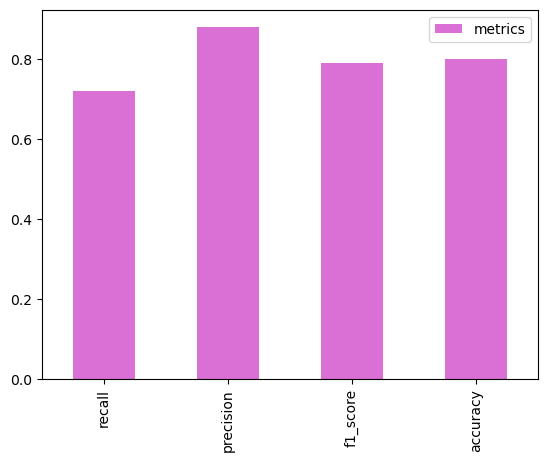

In [70]:
pd.DataFrame(gb_metric,index=["metrics"]).T.plot(kind="bar",color="orchid");

In [58]:
# testing
gb_metric = evaluate_pred(y_test,gb_test_pred)
gb_metric

{'recall': 0.72, 'precision': 0.88, 'f1_score': 0.79, 'accuracy': 0.8}

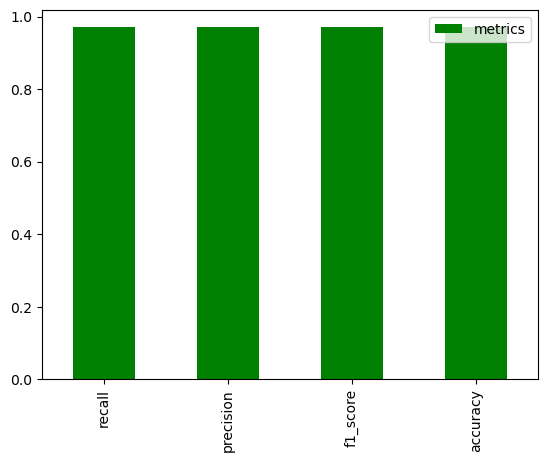

In [71]:
pd.DataFrame(gb_metric1,index=["metrics"]).T.plot(kind="bar",color="green");

Note : from my Hypertune the model that is performing well is the logistic model plus Randomforest and the other model are overfitting , so i will be going with my logistic model

## Checking features importance of Logistics model

In [77]:
np.random.seed(42)
lg = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 0.23357214690901212)
lg.fit(X_train,y_train)

# checking coefficient
lg.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [78]:
# matching coef's of feature of importance to columns
feature_dict = dict(zip(df.columns,list(lg.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

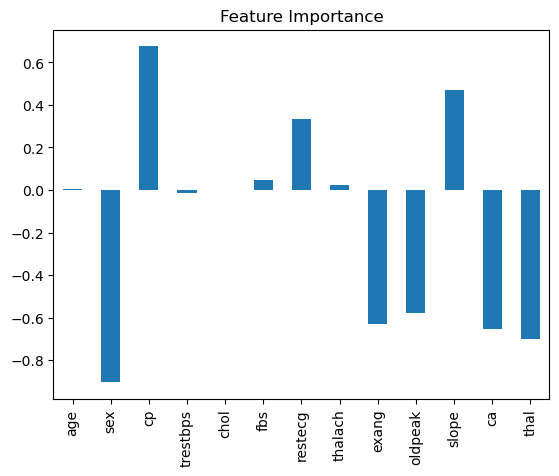

In [79]:
# using another way to matching it with columns and plot
feature_df = pd.DataFrame(feature_dict,index=[0])

# plotting
feature_df.T.plot.bar(title="Feature Importance",legend=False);

Note: This visualisation is showing the features importance with the Positive and Negative impact. what we are during is called Model driven Explorary

In [81]:
## save the model

import pickle

pickle.dump(log_grid,open("lograndomsearch-model.pkl","wb"))

In [82]:
# loading the save model to check on the test
load_model = pickle.load(open("lograndomsearch-model.pkl","rb"))
load_model.score(X_test,y_test)

0.8852459016393442